In [1]:
import torch
import torch.nn as nn
from torchvision import transforms
import torchvision.datasets as datasets
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np
import sys

## Load MNIST


In [2]:
# Load MNIST 
trainset = datasets.MNIST(root='./data', train=True, download=True, 
                      transform=transforms.Compose([transforms.ToTensor(),transforms.Pad(2)]))
testset = datasets.MNIST(root='./data', train=False, download=True, 
                      transform=transforms.Compose([transforms.ToTensor(),transforms.Pad(2)]))

In [3]:
valset, testset = torch.utils.data.random_split(testset, 
                                                [int(0.5 * len(testset)), 
                                                 int(0.5 * len(testset))])
train_loader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
val_loader = torch.utils.data.DataLoader(valset, batch_size=32, shuffle=False)
test_loader = torch.utils.data.DataLoader(testset, batch_size=32, shuffle=False)

print("Training dataset size: ", len(trainset))
print("Validation dataset size: ", len(valset))
print("Testing dataset size: ", len(testset))

Training dataset size:  60000
Validation dataset size:  5000
Testing dataset size:  5000


In [4]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f'Using: {device}')

Using: cpu


## Filter creation

In [5]:
# Filter creation 
def create_filters(filter_size, stripe_width):
    filters = []

    start = (filter_size - stripe_width) //2     

    # Horizontal
    horizontal = torch.ones((filter_size, filter_size), dtype=torch.float32)
    horizontal[start:start+stripe_width, :] = 0  # Set horizontal stripes with ones
    filters.append(horizontal)  

    # Vertical
    vertical = torch.ones((filter_size,filter_size), dtype=torch.float32)
    vertical[:, start:start+stripe_width] = 0  
    filters.append(vertical)
    
    # Diagonal 45deg & 135deg
    diag45 = torch.ones((filter_size,filter_size), dtype=torch.float32)
    diag135 = torch.ones((filter_size,filter_size), dtype=torch.float32)

    for i in range(filter_size):
        for j in range(stripe_width):
            if 0 <= i+j < filter_size:
                diag45[i, i+j] = 0
              
            if 0 <= filter_size-i-1-j < filter_size:
                diag135[i, filter_size-i-1-j] = 0

    filters.append(diag45)
    filters.append(diag135)

    return filters

## LeNet with filters

In [6]:
#LeNet with the 4 filters

class LeNet_5(nn.Module):

  def __init__(self, filters):
    super().__init__()

    self.filters = nn.ModuleList()

    for i_fil in filters:
      conv_fil = nn.Conv2d(1,1, kernel_size = 3, stride=1, padding='same', bias=False)
      
      conv_fil.weight.data = i_fil  
      conv_fil.weight.requires_grad = False  # Ensure weights are not updated during training

      self.filters.append(conv_fil)
    
    
    self.tanh = nn.Tanh()
    self.c1 = nn.Conv2d(len(filters),6,kernel_size=5, stride=1, padding=0)
    self.s2 = nn.AvgPool2d(kernel_size=2, stride=2)

    self.c3_0 = nn.Conv2d(3,1,kernel_size=5,stride=1)
    self.c3_1 = nn.Conv2d(3,1,kernel_size=5,stride=1)
    self.c3_2 = nn.Conv2d(3,1,kernel_size=5,stride=1)
    self.c3_3 = nn.Conv2d(3,1,kernel_size=5,stride=1)
    self.c3_4 = nn.Conv2d(3,1,kernel_size=5,stride=1)
    self.c3_5 = nn.Conv2d(3,1,kernel_size=5,stride=1)
    self.c3_6 = nn.Conv2d(4,1,kernel_size=5,stride=1)
    self.c3_7 = nn.Conv2d(4,1,kernel_size=5,stride=1)
    self.c3_8 = nn.Conv2d(4,1,kernel_size=5,stride=1)
    self.c3_9 = nn.Conv2d(4,1,kernel_size=5,stride=1)
    self.c3_10 = nn.Conv2d(4,1,kernel_size=5,stride=1)
    self.c3_11 = nn.Conv2d(4,1,kernel_size=5,stride=1)
    self.c3_12 = nn.Conv2d(4,1,kernel_size=5,stride=1)
    self.c3_13 = nn.Conv2d(4,1,kernel_size=5,stride=1)
    self.c3_14 = nn.Conv2d(4,1,kernel_size=5,stride=1)
    self.c3_15 = nn.Conv2d(6,1,kernel_size=5,stride=1)

    self.s4 = nn.AvgPool2d(kernel_size=2, stride=2)

    self.c5 = nn.Conv2d(16,120,kernel_size=5,stride=1)

    self.l1 = nn.Linear(120,84)
    self.l2 = nn.Linear(84,10)

    self.tanh = nn.Tanh()
    
  

  def forward(self,x):

    device = 'cuda' if torch.cuda.is_available() else 'cpu'

    fil_conv = []

    for i_conv in self.filters:
      convs = i_conv(x)  
      fil_conv.append(convs)  

    filconv_out = torch.cat(fil_conv, dim=1)  

        
    dim = x.shape[0]
    #out1 = self.filterdev(x)
    out = self.c1(filconv_out)
    out = self.tanh(out)
    out = self.s2(out)

    basket = torch.zeros((dim,16,10,10)).to(device)
    
    basket[:,0,:,:] = self.c3_0(out[:,[0,1,2],:,:])[:,0,:,:]
    basket[:,1,:,:] = self.c3_1(out[:,[1,2,3],:,:])[:,0,:,:]
    basket[:,2,:,:] = self.c3_2(out[:,[2,3,4],:,:])[:,0,:,:]
    basket[:,3,:,:] = self.c3_3(out[:,[3,4,5],:,:])[:,0,:,:]
    basket[:,4,:,:] = self.c3_4(out[:,[0,4,5],:,:])[:,0,:,:]
    basket[:,5,:,:] = self.c3_5(out[:,[0,1,5],:,:])[:,0,:,:]
    basket[:,6,:,:] = self.c3_6(out[:,[0,1,2,3],:,:])[:,0,:,:]
    basket[:,7,:,:] = self.c3_7(out[:,[1,2,3,4],:,:])[:,0,:,:]
    basket[:,8,:,:] = self.c3_8(out[:,[2,3,4,5],:,:])[:,0,:,:]
    basket[:,9,:,:] = self.c3_9(out[:,[0,3,4,5],:,:])[:,0,:,:]
    basket[:,10,:,:] = self.c3_10(out[:,[0,1,4,5],:,:])[:,0,:,:]
    basket[:,11,:,:] = self.c3_11(out[:,[0,1,2,5],:,:])[:,0,:,:]
    basket[:,12,:,:] = self.c3_12(out[:,[0,1,3,4],:,:])[:,0,:,:]
    basket[:,13,:,:] = self.c3_13(out[:,[1,2,4,5],:,:])[:,0,:,:]
    basket[:,14,:,:] = self.c3_14(out[:,[0,2,3,5],:,:])[:,0,:,:]
    basket[:,15,:,:] = self.c3_15(out)[:,0,:,:]
    
    out = basket
    out = self.tanh(out)
    out = self.s4(out)
    out = self.c5(out)

    temp = torch.zeros(dim,120).to(device)

    for idx in range(dim):
      temp[idx,:] = out[idx,:,0,0]
    
    out = temp
    out = self.tanh(out)
    out = self.l1(out)
    out = self.tanh(out)
    out = self.l2(out)

    return out

In [7]:
# Trainer

import gc

class Trainer():
  def __init__(self, net):
    self.device = 'cuda' if torch.cuda.is_available() else 'cpu'
    self.net = net


  def _train_epoch(self, trainloader, optimizer, loss_fn, 
                   retitrain = False):
    
    loss_basket = 0
    n_batches = len(trainloader)

    for i, data in enumerate(trainloader):
      batch, labels = data
      batch, labels = batch.to(self.device), labels.to(self.device)

      self.net.train()
      out = self.net(batch)
      loss = loss_fn(out, labels)
      optimizer.zero_grad()
      loss.backward()

      # if retitrain:
      #   # here we keep setting to 0 the grads of specific color
      #   # interactions (rk = retina kernel)
      #   rk_size = self.net.retina.conv.weight[0,0].shape[0]
      #   for i, cube in enumerate(self.net.retina.conv.weight.grad):
      #       if i != 2:
      #           cube.data[2] = torch.zeros(1,rk_size,rk_size)
      #       else:
      #           cube.data[:2] = torch.zeros(2,rk_size,rk_size)

      optimizer.step()

      loss_basket += loss

    return loss_basket/n_batches


  def _valid_epoch(self, validloader, optimizer, loss_fn):

    n_batches = len(validloader)
    v_loss_basket = 0
    v_accuracy_basket = 0

    self.net.eval()

    # Possible fix for running out of memory!
    # with torch.no_grad():
    for v_batch, v_labels in validloader:

      v_batch, v_labels = v_batch.to(self.device), v_labels.to(self.device)
      out = self.net(v_batch)

      v_loss_basket += loss_fn(out, v_labels)
      v_accuracy_basket += (out.argmax(axis=1)==v_labels).sum()/len(v_labels)

    return v_loss_basket/n_batches, v_accuracy_basket/n_batches




  def train(self, trainloader, validloader, optimizer, loss_fn,
            epochs, retitrain = False, plotting = False):
    
    losses = []
    v_losses = []
    v_accs = []

    for t in range(epochs):
      
      # train epoch
      gc.collect()
      loss = self._train_epoch(trainloader, optimizer, loss_fn,
                               retitrain = retitrain)
      # valid epoch
      gc.collect()
      vloss, vacc = self._valid_epoch(validloader, optimizer, loss_fn)

      # gather the data for plotting
      losses.append(loss.cpu().detach().numpy())
      v_losses.append(vloss.cpu().detach().numpy())
      v_accs.append(vacc.cpu().detach().numpy())

      completed = (t*100)//epochs
      print(f"Training {completed}%: \t loss {loss:.5f}\t v_loss {vloss:.5f},\t v_acc {vacc:.5f}")


    if plotting: 
      x = range(len(losses))

      fig = plt.figure(figsize=(10,5))
      fig.add_subplot(1,2,1)
      plt.plot(x,losses, label="Training loss")
      plt.plot(x,v_losses, label="Validation loss")
      plt.xlabel("Epochs")
      plt.legend()
      fig.add_subplot(1,2,2)
      plt.plot(x,v_accs, label="Validation accuracy")
      plt.xlabel("Epochs")
      plt.legend()
      plt.show()

    print("Training complete.")
    

In [8]:
optimizer = torch.optim.Adam 
start_lr = 1e-3 
epochs = 20

loss_fn = torch.nn.CrossEntropyLoss()

In [9]:
# Filter creation: filter size=7/10, stripe_width=1/3/5 
filters = create_filters(filter_size=7,stripe_width=3)
filters = [filter.unsqueeze(0).unsqueeze(0) for filter in filters]

model = LeNet_5(filters=filters).to(device)

optimizer = optimizer(model.parameters(), lr=start_lr)

print(model)

trainer = Trainer(model)

LeNet_5(
  (filters): ModuleList(
    (0-3): 4 x Conv2d(1, 1, kernel_size=(3, 3), stride=(1, 1), padding=same, bias=False)
  )
  (tanh): Tanh()
  (c1): Conv2d(4, 6, kernel_size=(5, 5), stride=(1, 1))
  (s2): AvgPool2d(kernel_size=2, stride=2, padding=0)
  (c3_0): Conv2d(3, 1, kernel_size=(5, 5), stride=(1, 1))
  (c3_1): Conv2d(3, 1, kernel_size=(5, 5), stride=(1, 1))
  (c3_2): Conv2d(3, 1, kernel_size=(5, 5), stride=(1, 1))
  (c3_3): Conv2d(3, 1, kernel_size=(5, 5), stride=(1, 1))
  (c3_4): Conv2d(3, 1, kernel_size=(5, 5), stride=(1, 1))
  (c3_5): Conv2d(3, 1, kernel_size=(5, 5), stride=(1, 1))
  (c3_6): Conv2d(4, 1, kernel_size=(5, 5), stride=(1, 1))
  (c3_7): Conv2d(4, 1, kernel_size=(5, 5), stride=(1, 1))
  (c3_8): Conv2d(4, 1, kernel_size=(5, 5), stride=(1, 1))
  (c3_9): Conv2d(4, 1, kernel_size=(5, 5), stride=(1, 1))
  (c3_10): Conv2d(4, 1, kernel_size=(5, 5), stride=(1, 1))
  (c3_11): Conv2d(4, 1, kernel_size=(5, 5), stride=(1, 1))
  (c3_12): Conv2d(4, 1, kernel_size=(5, 5), stri

Training 0%: 	 loss 0.25274	 v_loss 0.09028,	 v_acc 0.97174
Training 20%: 	 loss 0.08224	 v_loss 0.06161,	 v_acc 0.98129
Training 40%: 	 loss 0.06120	 v_loss 0.05148,	 v_acc 0.98328
Training 60%: 	 loss 0.05057	 v_loss 0.04790,	 v_acc 0.98507
Training 80%: 	 loss 0.04313	 v_loss 0.05176,	 v_acc 0.98268


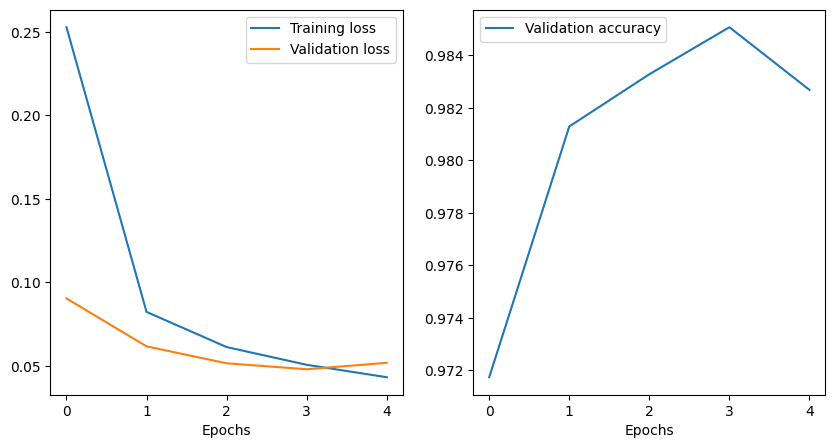

Training complete.


In [10]:
import gc
gc.collect()

trainer.train(trainloader = train_loader,
              validloader = val_loader,
              optimizer = optimizer,
              loss_fn = loss_fn,
              epochs = 5,
              plotting = True)

In [11]:
torch.save(model.state_dict(),"LeNet_5_f7_w3.pth")

## Occlusions

In [12]:
# Function to apply anti-diagonal occlusion
def apply_anti_diagonal_occlusion(image, stripe_width=4, stripe_spacing=4):
    image = image.clone()
    _, h, w = image.shape
    
    for i in range(-h, w, stripe_width + stripe_spacing):
        for j in range(stripe_width):
            x_indices = torch.arange(max(0, -i), min(h, w - i))
            y_indices = x_indices + i + j
            valid_mask = (y_indices >= 0) & (y_indices < w)
            image[0, x_indices[valid_mask], y_indices[valid_mask]] = 0  # Set occluded pixels to 0
    
    return image

In [13]:
# Generate occlusion configurations dynamically: (width, spacing) from 1 to 10
occlusion_configs = [(w, s) for w in range(1, 11) for s in range(1, 11)]
results = []

# Load the trained LeNet-5 model
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = LeNet_5(filters=filters).to(device)
model.load_state_dict(torch.load("LeNet_5_f7_w3.pth", map_location=device))
model.eval()

# Create a folder to save the datasets
# import os
# save_dir = './occluded_datasets/'
# if not os.path.exists(save_dir):
    # os.makedirs(save_dir)

# Evaluate LeNet-5 on occluded MNIST for different occlusion configurations
for stripe_width, stripe_spacing in occlusion_configs:
    occluded_images = []
    labels = []
    
    for i in range(5000):  # Taking 5000 MNIST images
        img, label = testset[i]
        occluded_img = apply_anti_diagonal_occlusion(img, stripe_width, stripe_spacing)
        occluded_images.append(occluded_img)
        labels.append(label)
    
    # Convert to tensor dataset
    test_images = torch.stack(occluded_images)
    test_labels = torch.tensor(labels)
    test_dataset = torch.utils.data.TensorDataset(test_images, test_labels)
    test_loader = DataLoader(test_dataset, batch_size=5000, shuffle=False)
    
    # Save the dataset as a PyTorch tensor file
    #dataset_name = f"occluded_mnist_{stripe_width}_{stripe_spacing}.pt"
    #torch.save((test_images, test_labels), os.path.join(save_dir, dataset_name))

    # Test accuracy
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            predictions = torch.argmax(outputs, dim=1)
            correct += (predictions == labels).sum().item()
            total += labels.size(0)
    
    accuracy = correct / total
    results.append((stripe_width, stripe_spacing, accuracy))
    print(f"Occlusion (Width={stripe_width}, Spacing={stripe_spacing}) -> Accuracy: {accuracy:.4f}")

#print("All datasets have been saved.")

Occlusion (Width=1, Spacing=1) -> Accuracy: 0.9826
Occlusion (Width=1, Spacing=2) -> Accuracy: 0.9838
Occlusion (Width=1, Spacing=3) -> Accuracy: 0.9820
Occlusion (Width=1, Spacing=4) -> Accuracy: 0.9786
Occlusion (Width=1, Spacing=5) -> Accuracy: 0.9776
Occlusion (Width=1, Spacing=6) -> Accuracy: 0.9808
Occlusion (Width=1, Spacing=7) -> Accuracy: 0.9778
Occlusion (Width=1, Spacing=8) -> Accuracy: 0.9796
Occlusion (Width=1, Spacing=9) -> Accuracy: 0.9804
Occlusion (Width=1, Spacing=10) -> Accuracy: 0.9798
Occlusion (Width=2, Spacing=1) -> Accuracy: 0.9744
Occlusion (Width=2, Spacing=2) -> Accuracy: 0.9718
Occlusion (Width=2, Spacing=3) -> Accuracy: 0.9490
Occlusion (Width=2, Spacing=4) -> Accuracy: 0.9196
Occlusion (Width=2, Spacing=5) -> Accuracy: 0.9200
Occlusion (Width=2, Spacing=6) -> Accuracy: 0.9086
Occlusion (Width=2, Spacing=7) -> Accuracy: 0.9460
Occlusion (Width=2, Spacing=8) -> Accuracy: 0.9566
Occlusion (Width=2, Spacing=9) -> Accuracy: 0.9506
Occlusion (Width=2, Spacing=10

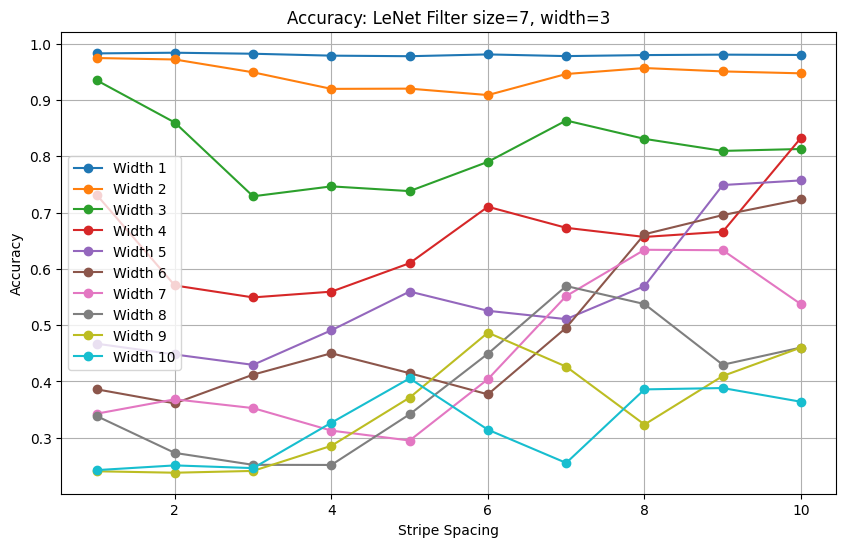

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# Convert results to NumPy array
results = np.array(results)

# Get unique widths
widths = np.unique(results[:, 0])

# Plot accuracy vs. spacing for different widths
plt.figure(figsize=(10, 6))

for width in widths:
    subset = results[results[:, 0] == width]  # Get data for this width
    plt.plot(subset[:, 1], subset[:, 2], marker='o', linestyle='-', label=f'Width {int(width)}')

plt.xlabel('Stripe Spacing')
plt.ylabel('Accuracy')
plt.title('Accuracy: LeNet Filter size=7, width=3')
plt.legend()
plt.grid(True)
plt.savefig('Accuracy_LeNet_f7_w33.png', dpi=300)
plt.show()
plt.close()